# Loan Approval Prediction

<br>
This project is completed as part of the online hackathon organized by [Analytics Vidhya](https://www.analyticsvidhya.com/). Evaluation metric of the hackathon is accuracy i.e. percentage of loan approval that is correctly predicted.

This project covers the whole process from problem statement to model development and evaluation:
1. [Problem Statement](#problem)
2. [Hypothesis Generation](#hypothesis)
3. [Data Collection](#data)
4. [Exploratory Data Analysis (EDA)](#eda)
5. [Data Pre-processing](#pre)
6. [Model Development and Evaluation](#model)
7. [Conclusion](#conclusion)



***
# <a name="problem">Problem Statement</a>

### _Business Problem_
"Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers."

Loan prediction is a very common real-life problem that every retail bank faces in their lending operations. If the loan approval process is automated, it can save a lot of man hours and improve the speed of service to the customers. The increase in customer satisfaction and savings in operational costs are significant. However, the benefits can only be reaped if the bank has a robust model to accurately predict which customer's loan it should approve and which to reject, in order to minimize the risk of loan default.

### _Translate Business Problem into Data Science / Machine Learning problem_
This is a classification problem where we have to predict whether a loan will be approved or not. Specifically, it is a binary classification problem where we have to predict either one of the two classes given i.e. approved (Y) or not approved (N). Another way to frame the problem is to predict whether the loan will likely to default or not, if it is likely to default, then the loan would not be approved, and vice versa. The dependent variable or target variable is the Loan_Status, while the rest are independent variable or features. We need to develop a model using the features to predict the target variable.



***
# <a name="hypothesis">Hypothesis Generation</a>
Hypothesis Generation is the process of listing out all the possible factors that can affect the outcome i.e. which of the features will have an impact on whether a loan will be approved or not. Some of the hypothesis are: 

- Education - Applicants with higher education level i.e. graduate level should have higher chances of loan approval
- Income: Applicants with higher income should have more chances of loan approval
- Loan amount: If the loan amount is less, the chances of loan approval should be high
- Loan term: Loans with shorter time period should have higher chances of approval
- Previous credit history: Applicants who have repayed their previous debts should have higher chances of loan approval
- Monthly installment amount: If the monthly installment amount is low, the chances of loan approval should be high
- And so on

Some of the hypothesis seem intuitive while others may not. We will try to validate each of these hypothesis based on the dataset.



***
# <a name="data">Data Collection</a>

The data have already been provided by Analytics Vidhya on the [Hackathon page](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/).

***
# <a name="eda">Exploratory Data Analysis (EDA)</a>


In [3]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# load the train and test dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
# make a copy of original data
# so that even if we have to make any changes in these datasets we would not lose the original datasets

train_original = train.copy()
test_original = test.copy()

In [6]:
# take a look at the top 5 rows of the train set, notice the column "Loan_Status"
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# take a look at the top 5 rows of the test set, notice the absense of "Loan_Status" that we will predict
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
# show the shape of the dataset i.e. no of rows, no of columns
train.shape, test.shape

((614, 13), (367, 12))

In [9]:
# calculate train-test-split ratio
train.shape[0]/(train.shape[0]+test.shape[0]), test.shape[0]/(train.shape[0]+test.shape[0])

(0.6258919469928644, 0.37410805300713557)

In [10]:
# take a look at the features (i.e. independent variables) in the dataset
train.columns, test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

**Note: ** There are 13 columns of features and 614 rows of records in the train set and 12 columns of features and 367 rows of records in the test set. There are a total of 981 records combining both train and test set, representing a train-test-split of approx 63% and 37%. The features are similar in the test set as the train data except the Loan_Status. We will predict the Loan_Status using the model built using the train data.

In [11]:
# show the data types for each column of the train set
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
# concise summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Note: ** There are 3 data types in the data
- object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
- int64: It represents the integer variables. ApplicantIncome is of this format.
- float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History

**Why Data Types are important?**

Datatypes are an important concept because statistical methods can only be used with certain data types. You have to analyze continuous data differently than categorical data otherwise it would result in a wrong analysis. Therefore knowing the types of data you are dealing with, enables you to choose the correct method of analysis.

## Univariate analysis
Univariate analysis is when we analyze each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, a histogram or a box-plot can be used to look at the distribution of the variable. With a histogram, you can check the central tendency, variability, modality, and kurtosis of a distribution. Note that a histogram can’t show you if you have any outliers. This is why we also use box-plots.

### Target Variable (Categorical)
We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [13]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
# percentage distribution can be calculated by setting the normalize=True to show proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

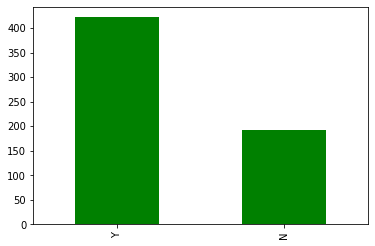

In [15]:
# bar plot to visualize the frequency
train['Loan_Status'].value_counts().plot.bar(color='green')

**Note: ** The loan of 422 (around 69%) people out of 614 was approved. There is no imbalanced classes issue in this dataset, thus accuracy as an evaluation metric should be appropriate. On the other hand, if there are imbalanced or skewed classes, then we might need to use precision and recall as evaluation metrics.

### Independent Variable (Categorical)
There are 5 features that are categorical or binary (Gender, Married, Self_Employed, Credit_History, Education)

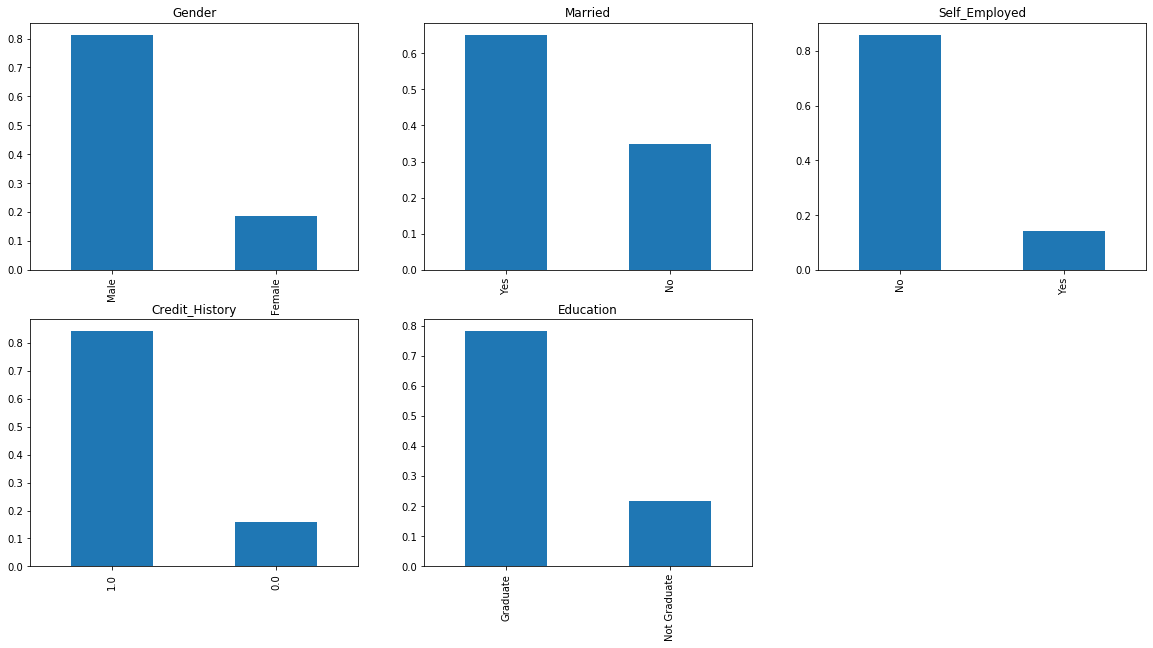

In [16]:
# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

It can be inferred from the above bar plots that:

- 80% applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have credit history (repaid their debts).
- Around 80% of the applicants are Graduate.


### Independent Variable (Ordinal)
There are 2 features that are Ordinal: Variables in categorical features having some order involved (Dependents, Property_Area)

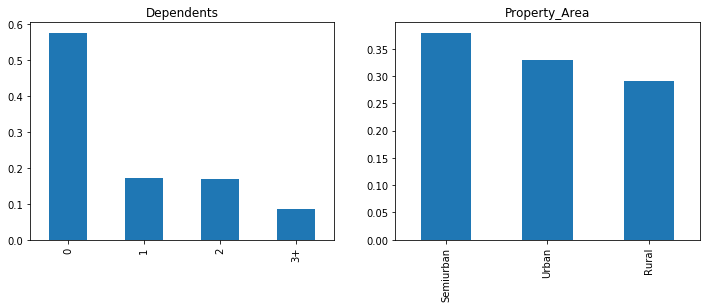

In [17]:
# Visualizing remaining categorical features
# plt.figure(1)
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

Following inferences can be made from the above bar plots:

- More than half of the applicants don’t have any dependents.
- Most of the applicants are from Semiurban area.


### Independent Variable (Numerical)
There are 4 features that are Numerical: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

Firstly, let’s look at the Applicant income distribution:

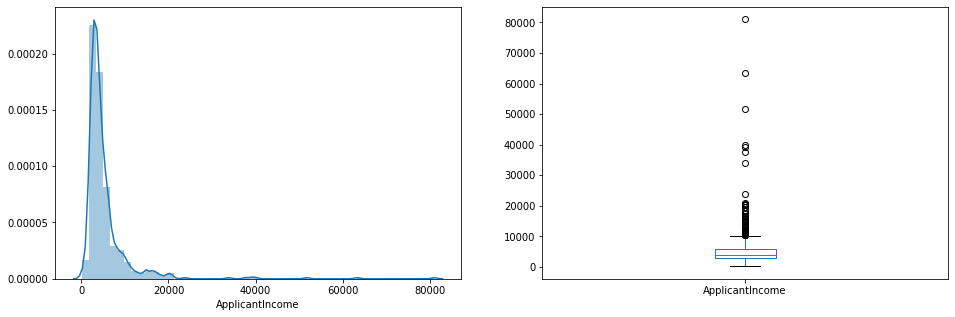

In [18]:
# Visualizing ApplicantIncome
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. The distribution is right-skewed (positive skewness). We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

Text(0.5, 0.98, '')

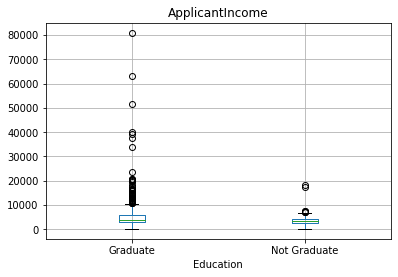

In [19]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Secondly, Let’s look at the Coapplicant income distribution.

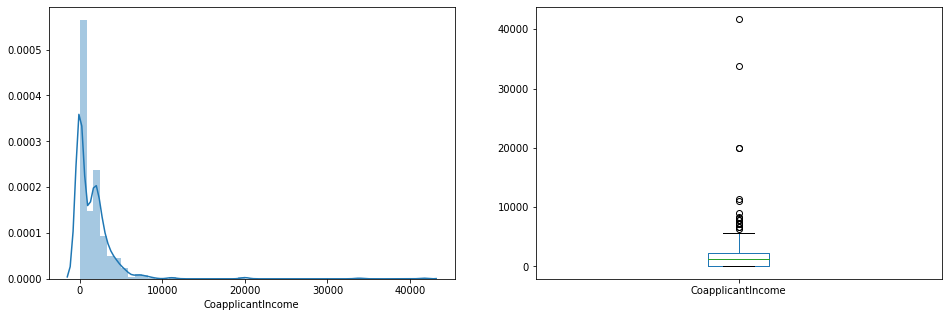

In [20]:
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Thirdly, let’s look at the distribution of LoanAmount variable.

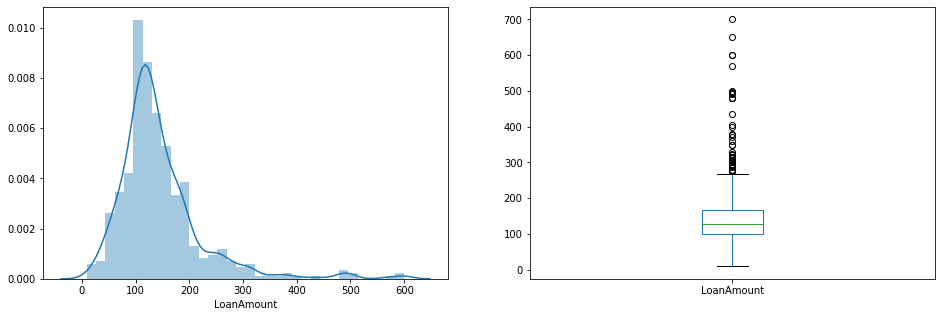

In [21]:
# plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a fairly normal distribution (albeit still slightly right-skewed) for LoanAmount but there are lot of outliers in this variable. We will treat the outliers in later sections.

Lastly, let’s look at the distribution of Loan_Amount_Term variable. Since Loan_Amount_Term is a discrete variable, we will use frequency table and bar plots which will calculate the number of each category.

In [22]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

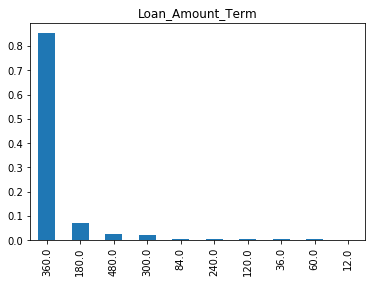

In [23]:
# plot bar chart
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')

It can be inferred from the above bar plot that:

- Around 85% of the loans are 360 months term or 30 years period


Now we would like to know how well each feature correlate with Loan Status. So, in the next section we will look at bivariate analysis.

## Bivariate Analysis
After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable in bivariate analysis. We can use bivariate analysis to test the hypotheses that we generated earlier.



**Categorical Independent Variable vs Target Variable**

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans. For example, we want to see whether an applicant's gender will have any effect on approval chances.

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


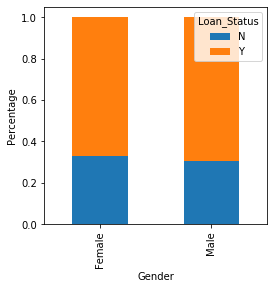

In [24]:
print(pd.crosstab(train['Gender'],train['Loan_Status']))

Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


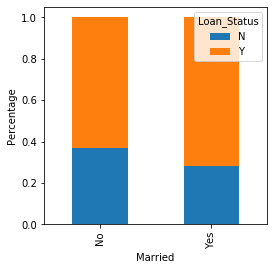

In [25]:
print(pd.crosstab(train['Married'],train['Loan_Status']))

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


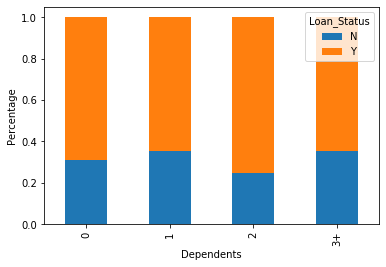

In [26]:
print(pd.crosstab(train['Dependents'],train['Loan_Status']))

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


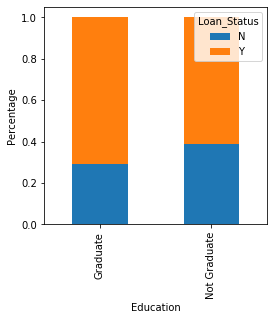

In [27]:
print(pd.crosstab(train['Education'],train['Loan_Status']))

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


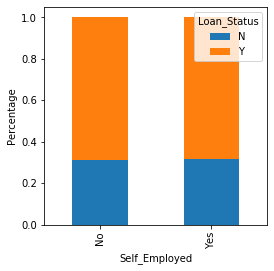

In [28]:
print(pd.crosstab(train['Self_Employed'],train['Loan_Status']))

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


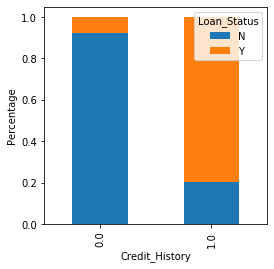

In [29]:
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


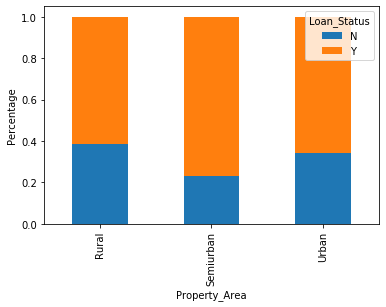

In [30]:
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

From the bar charts above, it can be inferred that:
- proportion of male and female applicants is more or less same for both approved and unapproved loans
- proportion of married applicants is higher for the approved loans
- distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status
- there is nothing significant we can infer from Self_Employed vs Loan_Status plot.
- proportion of loans getting approved for graduates is higher compared to non-graduates
- it seems people with credit history as 1 are more likely to get their loans approved
- proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Now let’s visualize numerical independent variables with respect to target variable.

**Numerical Independent Variable vs Target Variable**<br>

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


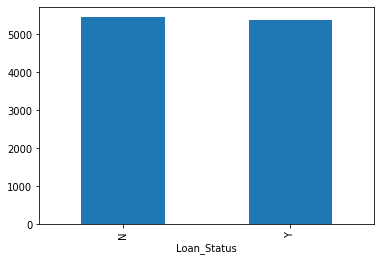

In [31]:
print(train.groupby('Loan_Status')['ApplicantIncome'].mean())

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any significant difference in the mean income between those approval and not approved applicant (5384 vs 5446). 

So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [32]:
# making bins for applicant income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

In [33]:
# take a look at the train set
train.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average


Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


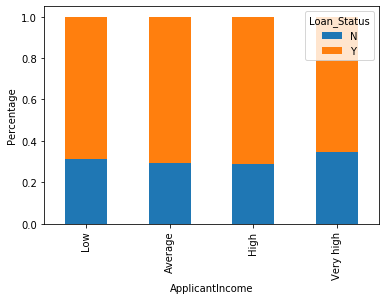

In [34]:
print(pd.crosstab(train['Income_bin'],train['Loan_Status']))

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the Coapplicant income and loan amount variable in similar manner.

In [35]:
# making bins for Coapplicant income variable
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

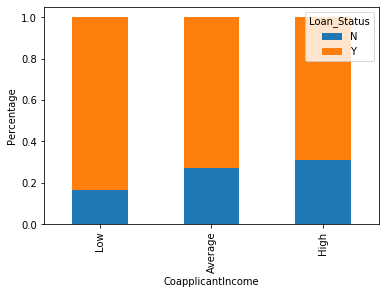

In [36]:
# plot the chart
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [37]:
print(len(train[train["CoapplicantIncome"] == 0]))
"Percentage of CoapplicantIncome = 0 is:",  len(train[train["CoapplicantIncome"] == 0])/len(train["CoapplicantIncome"])

273


('Percentage of CoapplicantIncome = 0 is:', 0.44462540716612375)

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant, so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

In [38]:
# create a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [39]:
# making bins for Total Income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)

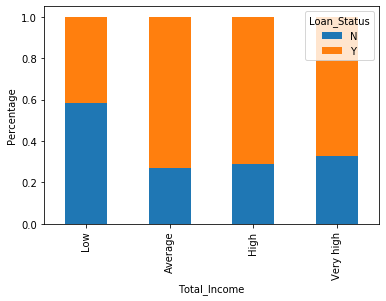

In [40]:
# plot the chart
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income. This is more consistent with our hypothesis with applicants with high income  will have more chances of loan approval.

Let’s visualize the Loan amount variable.

In [41]:
# making bins for LoanAmount variable
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

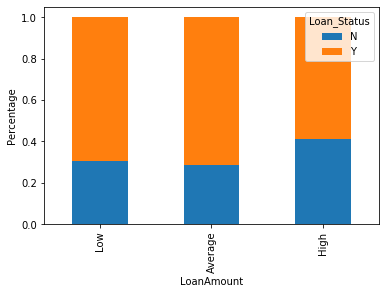

In [42]:
# plot the chart 
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less. 

Let’s drop the bins which we created for the exploration part. 

In [43]:
# before dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average


In [44]:
# drop the new variable of bins
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [45]:
# after dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We will change the 3+ in dependents variable to 3 to make it a numerical variable. We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [46]:
# replacing 3+ in Dependents variable with 3 for both train and test set
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

In [47]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

In [48]:
# check the dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


Now lets look at the correlation between all the numerical variables. We can use the `corr()` to compute pairwise correlation of columns, excluding NA/null values using pearson correlation coefficient. Then we will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


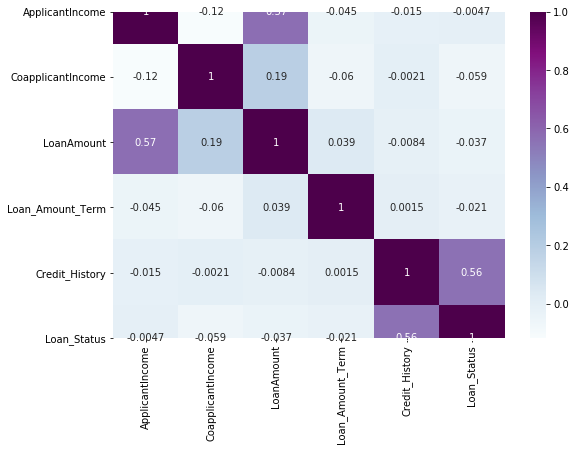

In [49]:
# calculate and visualize correlation matrix
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

**Note: ** We see that the most correlated variables are 
- (ApplicantIncome - LoanAmount) with correlation coefficient of 0.57
- (Credit_History - Loan_Status) with correlation coefficient of 0.56
- LoanAmount is also correlated with CoapplicantIncome with correlation coefficient of 0.19.

***
# <a name="pre">Data Pre-processing</a>

Data pre-processing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data pre-processing is a method of resolving such issues.

## Missing value and outlier treatment
After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

### Missing value imputation

Let’s list out feature-wise count of missing values.

In [50]:
# check for missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features. We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

- For numerical variables: imputation using mean or median
- For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features. If an independent variable in our dataset has huge amount of missing data e.g. 80% missing values in it, then we would drop the variable from the dataset.

In [51]:
# replace missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [52]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [53]:
# replace missing value with the mode
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [54]:
# replace missing values with the median value due to outliers
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [55]:
# check whether all the missing values are filled in the Train dataset
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the Train dataset. Let’s fill all the missing values in the test dataset too with the same approach. 

**Note: ** We need to replace the missing values in Test set using the mode/median/mean of the Training set, not from the Test set. Likewise, if you remove values above some threshold in the test case, make sure that the threshold is derived from the training and not test set. Make sure to calculate the mean (or any other metrics) only on the train data to avoid data leakage to your test set.

In [56]:
# replace missing values in Test set with mode/median from Training set
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [57]:
# check whether all the missing values are filled in the Test dataset
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

As we can see that all the missing values have been filled in the Test dataset.



### Outlier Treatment 

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Having outliers in the dataset often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness (or positive skewness). One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

Text(0.5, 1.0, 'Test')

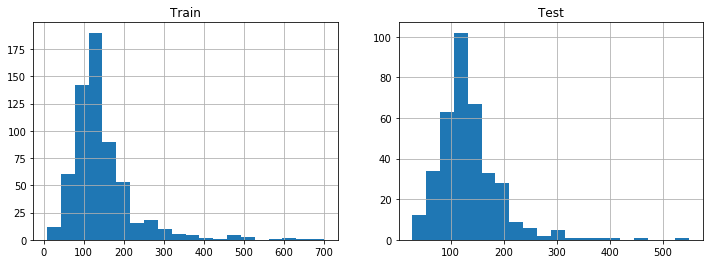

In [58]:
# before log transformation

ax1 = plt.subplot(121)
train['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount'].hist(bins=20)
ax2.set_title("Test")

In [59]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Text(0.5, 1.0, 'Test')

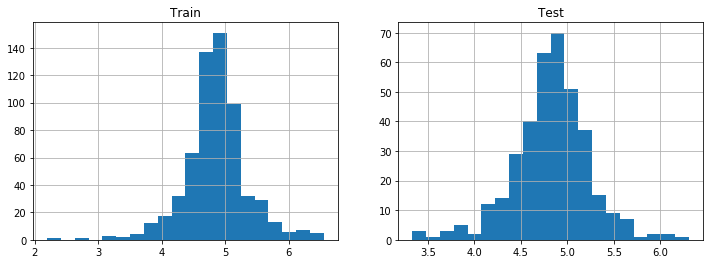

In [60]:
# after log transformation

ax1 = plt.subplot(121)
train['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount_log'].hist(bins=20)
ax2.set_title("Test")

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

***
# <a name="model">Model Development and Evaluation</a>

There are four sub-sections in this stage:
- [Evaluation Metrics for Classification Problems](#evaluation)
- [Model Building : Part I](#model1)
- [Feature Engineering](#feature)
- [Model Building : Part II](#model2)

***
## <a name="evaluation">Evaluation Metrics for Classification Problems</a>


The process of model building is not complete without evaluation of model’s performance. Suppose we have the predictions from the model, how can we decide whether the predictions are accurate? We can plot the results and compare them with the actual values, i.e. calculate the distance between the predictions and actual values. Lesser this distance more accurate will be the predictions. Since this is a classification problem, we can evaluate our models using any one of the following evaluation metrics:

**Accuracy**: Let us understand it using the confusion matrix which is a tabular representation of Actual vs Predicted values. This is how a confusion matrix looks like:


<table><tr><td><img height="400" width="400" src="confusion_matrix.jpg"></td></tr></table>

    True Positive - Targets which are actually true(Y) and we have predicted them true(Y)
    True Negative - Targets which are actually false(N) and we have predicted them false(N)
    False Positive - Targets which are actually false(N) but we have predicted them true(T)
    False Negative - Targets which are actually true(T) but we have predicted them false(N)

Using these values, we can calculate the accuracy of the model. The accuracy is given by:

_Accuracy = (TP+TN) / (TP+TN+FP+FN)_

**Precision**: It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, how many are actually labeled true.

_Precision = TP / (TP + FP)_

**Recall (Sensitivity)** - It is a measure of actual observations which are predicted correctly i.e. how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’. E.g. Proportion of patients with a disease who test positive.

_Recall = TP / (TP + FN)_

**Specificity** - It is a measure of how many observations of false class are labeled correctly. E.g. Proportion of patients without the disease who test negative.

_Specificity = TN / (TN + FP)_

Specificity and Sensitivity plays a crucial role in deriving ROC curve.

**ROC curve**

- Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (Sensitivity) and false positive rate (1- Specificity).
- The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.
- The area of this curve measures the ability of the model to correctly classify true positives and true negatives. We want our model to predict the true classes as true and false classes as false.
- So it can be said that we want the true positive rate to be 1. But we are not concerned with the true positive rate only but the false positive rate too. For example in our problem, we are not only concerned about predicting the Y classes as Y but we also want N classes to be predicted as N.
- We want to increase the area of the curve which will be maximum for class 2,3,4 and 5 in the above example.
- For class 1 when the false positive rate is 0.2, the true positive rate is around 0.6. But for class 2 the true positive rate is 1 at the same false positive rate. So, the AUC for class 2 will be much more as compared to the AUC for class 1. So, the model for class 2 will be better.
- The class 2,3,4 and 5 model will predict more accurately as compared to the class 0 and 1 model as the AUC is more for those classes.

This is how a ROC curve looks like:
<table><tr><td><img height="400" width="400" src="roc.jpg"></td></tr></table>

At the competition’s page, it has been mentioned that our submission data would be evaluated based on the accuracy. Hence, we will use accuracy as our evaluation metric.

To know more about evaluation metrics, read this article: https://www.analyticsvidhya.com/blog/2016/02/7-important-model-evaluation-error-metrics/

In [61]:
#roc curve

https://github.com/ParidhiGola/Identifying-potential-customers-for-loans/blob/master/Supervised%20Learning_TheraBank_Personal%20Loan_olympus.ipynb

***
## <a name="model1">Model Building : Part I</a>

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

- Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
- Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
- This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function

To learn further on logistic regression, refer this article: https://www.analyticsvidhya.com/blog/2015/10/basics-logistic-regression/

Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [62]:
# drop Loan_ID 
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

To learn further about sklearn, refer here: http://scikit-learn.org/stable/tutorial/index.html

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [63]:
# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

- Consider the “Gender” variable. It has two classes, Male and Female.
- As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
- Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
- Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

We can use pandas `get_dummies` function to convert categorical variable into dummy/indicator variables, it will only convert "object" type and will not affect numerical type.

In [64]:
# adding dummies to the dataset
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [65]:
X.shape, train.shape, test.shape

((614, 21), (614, 22), (367, 21))

In [66]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [67]:
# import library
from sklearn.model_selection import train_test_split

In [68]:
# split the data into train and cross validation set
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=0)

In [69]:
# take a look at the dimension of the data
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((429, 21), (185, 21), (429,), (185,))

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [70]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [71]:
# fit the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Here the C=1.0 parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization. To learn about other parameters, refer here: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Let’s predict the Loan_Status for validation set and calculate its accuracy.

In [72]:
# make prediction
pred_cv = model.predict(x_cv)

Let us calculate how accurate our predictions are by calculating the accuracy.

In [73]:
# calculate accuracy score
accuracy_score(y_cv, pred_cv)

0.8324324324324325

So our predictions are over 83% accurate, i.e. we have identified 83% of the loan status correctly.

Let’s evaluate our model with the confusion matrix.

[[ 22  29]
 [  2 132]]


Text(33.0, 0.5, 'True')

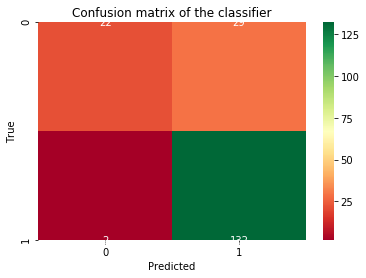

In [87]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, pred_cv)
print(cm)
#f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cm,annot=True, fmt="d",cmap='RdYlGn')
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

Let's build a text report showing the main classification metrics.

In [88]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_cv, pred_cv))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



The performance of our model seems encouraging, with accuracy of 83%, precision of 82% and recall of 99%.

Let’s make predictions for the test dataset and submit the result.

In [89]:
# make prediction on test set
pred_test = model.predict(test)

In [90]:
# take a look at the prediction
pred_test[:50]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

Lets import the submission file which we have to submit on the solution checker.

In [92]:
submission = pd.read_csv("Sample_Submission.csv")

We only need the Loan_ID and the corresponding Loan_Status for the final submission. we will fill these columns with the Loan_ID of test dataset and the predictions that we made, i.e., pred_test respectively.

In [94]:
# fill the Loan_ID and Loan_Status
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

In [95]:
# replace with "N" and "Y"
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [96]:
# take a look at the submission result
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


Finally we will convert the submission to .csv format and make submission to check the accuracy on the leaderboard.

In [97]:
# convert to CSV file, without row index
submission.to_csv('logistic1.csv', index=False)

From this submission we got an accuracy of 0.7847 on the leaderboard.

Instead of creating validation set, we can also make use of cross validation to validate our predictions. 

## Logistic Regression using stratified k-folds cross validation

To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:

- The validation set approach
- k-fold cross validation
- Leave one out cross validation (LOOCV)
- Stratified k-fold cross validation

If you wish to know more about validation techniques, then please refer this article: https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

In this section we will learn about stratified k-fold cross validation. Let us understand how it works:

- Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.
- For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.
- It is generally a better approach when dealing with both bias and variance.
- A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.

If K=N, then it is called Leave one out cross validation, where N is the number of observations.

Below is the visualization of a stratified k-fold validation when k=5.
<table><tr><td><img height="400" width="400" src="kfold.jpg"></td></tr></table>

In [98]:
# import StratifiedKFold from sklearn and fit the model
from sklearn.model_selection import StratifiedKFold

Now let’s make a cross validation logistic model with stratified 5 folds and make predictions for test dataset. The folds are made by preserving the percentage of samples for each class. In stratified k-fold, each fold contains roughly the same proportions of the different types of class labels.

**Note: ** Previously, we use train_test_split to split the data, in this example we will use StratifiedKFold to split the data, the final accuracy score might be slightly differently

In [99]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# make prediction on test set
pred_test = model.predict(test)


# calculate probability estimates of loan approval
# column 0 is the probability for class 0 and column 1 is the probability for class 1
# probability of loan default = 1 - model.predict_proba(test)[:,1]
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8360655737704918

Mean validation accuracy:  0.8111052353252248


In [100]:
"""
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    model = LogisticRegression(random_state=1)
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    score = accuracy_score(y_test, pred_test)
    print('accuracy_score', score)
    i+=1
"""

"\ni = 1\nkf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)\n\nfor train_index, test_index in kf.split(X, y):\n    print('\n{} of kfold {}'.format(i, kf.n_splits))\n    X_train, X_test = X.loc[train_index], X.loc[test_index]\n    y_train, y_test = y[train_index], y[test_index]\n  \n    model = LogisticRegression(random_state=1)\n    model.fit(X_train, y_train)\n    pred_test = model.predict(X_test)\n    score = accuracy_score(y_test, pred_test)\n    print('accuracy_score', score)\n    i+=1\n"

The mean validation accuracy for this model turns out to be 0.81. Let us visualize the ROC curve.

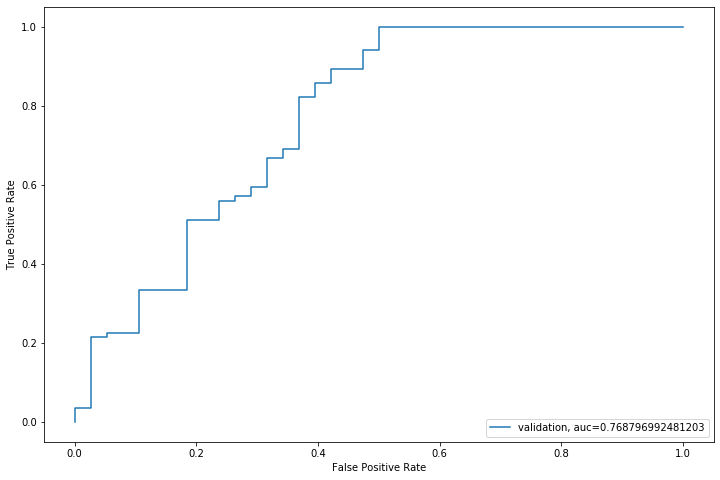

In [101]:
# visualize ROC curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

We got an AUC ("Area Under Curve") value of 0.77.

In [102]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

In [103]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

Lets convert the submission to .csv format and make submission to check the accuracy on the leaderboard.

In [104]:
# convert to CSV file, without row index
submission.to_csv('logistic.csv', index=False)

From this submission we got an accuracy of 0.7778 on the leaderboard. Now we will try to improve this accuracy using different approaches.

***
## <a name="feature">Feature Engineering</a>

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

- **Total Income** - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
- **Equated Monthly Installment** - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
- **Balance Income** - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.


In [105]:
# combine Applicant Income and Coapplicant Income into a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

Text(0.5, 1.0, 'Test')

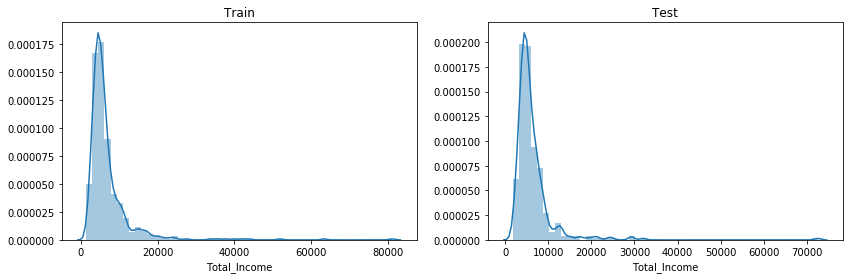

In [106]:
# check the distribution of Total Income
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income'])
 
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income'])
ax1.set_title("Test")

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

In [107]:
# log transformation
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

Text(0.5, 1.0, 'Test')

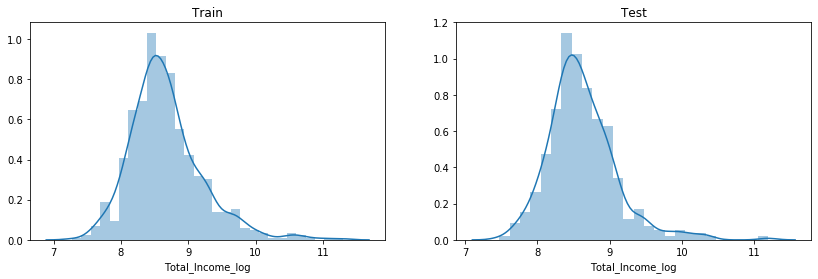

In [108]:
# after log transformation
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income_log'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income_log'])
ax1.set_title("Test")

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s create the EMI feature now. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term. It is just an approximation of actual EMI.

In [109]:
# create EMI feature
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

Let’s check the distribution of EMI variable. EMI is a continuous numerical variable.

Text(0.5, 1.0, 'Test')

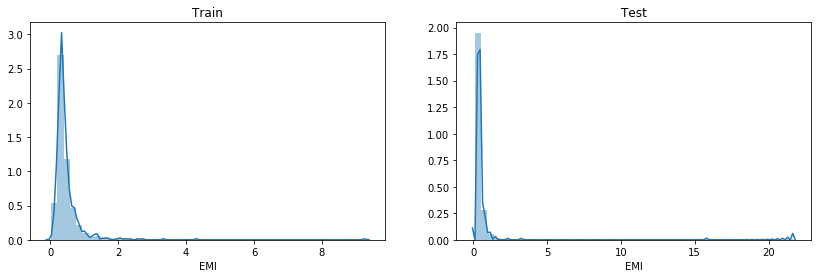

In [110]:
# check the distribution of EMI

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['EMI'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['EMI'])
ax1.set_title("Test")

Let us create Balance Income feature now and check its distribution. This is the income left after the EMI has been paid.

In [111]:
# create new "Balance Income" variable
train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income'] = test['Total_Income'] - (test['EMI']*1000)

Text(0.5, 1.0, 'Test')

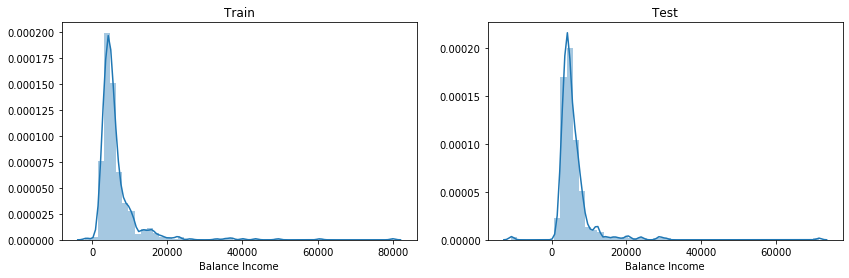

In [112]:
# check the distribution of EMI
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Balance Income'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Balance Income'])
ax1.set_title("Test")

Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too. We will drop "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term" as they are already represented by "Total Income", "EMI" and "Balance Income".

In [113]:
# before dropping variables
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


In [114]:
# drop the variables
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [115]:
# after dropping variables
train.head()

,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,1,4.852030,0,1,1,0,0,1,0,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,0,4.852030,0,1,0,1,0,0,1,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,1,4.189655,0,1,0,1,0,1,0,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,1,4.787492,0,1,0,1,0,1,0,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,1,4.948760,0,1,1,0,0,1,0,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


***
## <a name="model2">Model Building : Part II</a>


After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest and XGBoost.

We will build the following models in this section.

- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost

Let’s prepare the data for feeding into the models.

In [116]:
# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status                # Save target variable in separate dataset

### Logistic Regression

In [117]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# make prediction on test set
pred_test = model.predict(test)


# calculate probability estimates of loan approval
# column 0 is the probability for class 0 and column 1 is the probability for class 1
# probability of loan default = 1 - model.predict_proba(test)[:,1]
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8360655737704918

Mean validation accuracy:  0.8094658910629298


The mean validation accuracy for this model is 0.803

In [118]:
# filling Loan_Status with predictions
submission['Loan_Status'] = pred_test

# filling Loan_ID with test Loan_ID
submission['Loan_ID'] = test_original['Loan_ID'] 

In [119]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [120]:
# Converting submission file to .csv format
submission.to_csv('Log2.csv', index=False)

From this submission we got an accuracy of 0.7778 on the leaderboard. So we can infer feature engineering has not improved the model. Let us look at some other algorithms.

### Decision Tree

Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

For detailed explanation visit https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/#six

In [121]:
# import library
from sklearn import tree

Let’s fit the decision tree model with 5 folds of cross validation.

In [122]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.75

2 of kfold 5
accuracy_score 0.75

3 of kfold 5
accuracy_score 0.6721311475409836

4 of kfold 5
accuracy_score 0.6967213114754098

5 of kfold 5
accuracy_score 0.7049180327868853

Mean validation accuracy:  0.7147540983606557


The mean validation accuracy for this model is 0.71, which is lower than Logistic Regression, let's see how it perform on the Test set by submitting to the result.

In [123]:
# filling Loan_Status with predictions
submission['Loan_Status'] = pred_test            

# filling Loan_ID with test Loan_ID
submission['Loan_ID'] = test_original['Loan_ID'] 

In [124]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [125]:
# Converting submission file to .csv format
submission.to_csv('Decision Tree.csv', index=False)

We got an accuracy of 0.6458 which is much lesser than the accuracy from logistic regression model. So let’s build another model, i.e. Random Forest, a tree based ensemble algorithm and try to improve our model by improving the accuracy.

### Random Forest

- RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.
- For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
- Final prediction can be a function of all the predictions made by the individual learners.
- In case of regression problem, the final prediction can be mean of all the predictions.

There are some parameters worth exploring with the sklearn RandomForestClassifier:

- n_estimators
- max_features

n_estimators = ususally bigger the forest the better, there is small chance of overfitting here. The more estimators you give it, the better it will do. We will use the default value of 10.

max depth of each tree (default none, leading to full tree) - reduction of the maximum depth helps fighting with overfitting. We will limit at 10.

For detailed explanation visit this article https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

In [126]:
# import library
from sklearn.ensemble import RandomForestClassifier

In [127]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7338709677419355

2 of kfold 5
accuracy_score 0.7903225806451613

3 of kfold 5
accuracy_score 0.7868852459016393

4 of kfold 5
accuracy_score 0.7704918032786885

5 of kfold 5
accuracy_score 0.8524590163934426

Mean validation accuracy:  0.7868059227921735


The mean validation accuracy for this model is 0.783

### GridSearchCV

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. GridSearch is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

We will use GridSearchCV in sklearn.model_selection for an exhaustive search over specified parameter values for an estimator. GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid, hence GridSearchCV. More info at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.

In [128]:
# import library
from sklearn.model_selection import GridSearchCV

In [129]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [130]:
# default 3-fold cross validation, cv=3
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [131]:
# split the data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)

In [132]:
# fit the grid search model
grid_search.fit(x_train, y_train)

C:\Users\AnuragMishra\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gri

After the grid search model has been fit, we can use use `best_estimator_` to obtain the estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data.

In [133]:
# estimate the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=141,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

So, the optimized value for the max_depth variable is 3 and for n_estimator is 141. Now let’s build the model using these optimized values.

In [134]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=141)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8145161290322581

2 of kfold 5
accuracy_score 0.7983870967741935

3 of kfold 5
accuracy_score 0.7950819672131147

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8442622950819673

Mean validation accuracy:  0.8094658910629295


The mean validation accuracy has improved from 0.783 to 0.813

In [135]:
# filling Loan_Status with predictions
submission['Loan_Status']=pred_test            

# filling Loan_ID with test Loan_ID
submission['Loan_ID']=test_original['Loan_ID'] 

In [136]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [137]:
# Converting submission file to .csv format
submission.to_csv('Random Forest.csv', index=False)

We got an accuracy of 0.7638 from the random forest model on leaderboard.

### Feature Importance

Let us find the feature importance now, i.e. which features are most important for this problem. We will use feature_importances_ attribute of sklearn to do so. It will return the feature importances (the higher, the more important the feature).

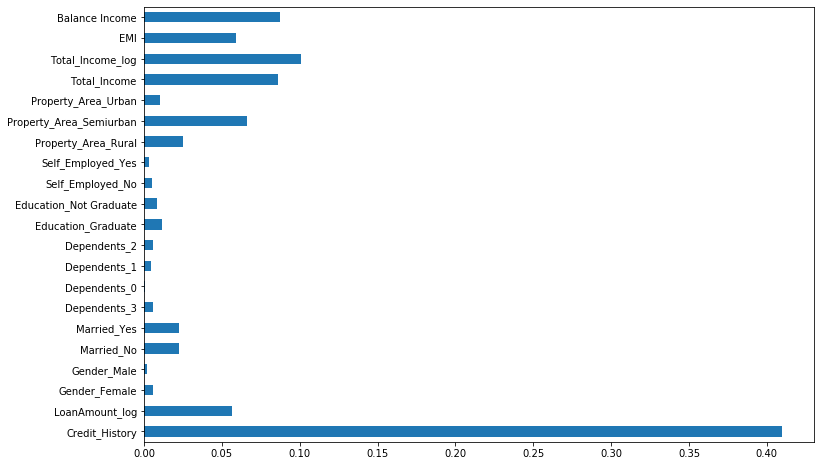

In [138]:
# extract feature importances, convert into a Series
importances = pd.Series(model.feature_importances_, index=X.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,8))

We can see that Credit_History is the most important feature followed by Total Income Log, Total Income, Balance Income, Property Area Suburban, EMI. So, feature engineering helped us in predicting our target variable.

### XGBoost

XGBoost is a fast and efficient algorithm and has been used to by the winners of many data science competitions. It’s a boosting algorithm and you may refer the below article to know more about boosting:https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/

XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables. Let’s have a look at the parameters that we are going to use in our model.

- n_estimator: This specifies the number of trees for the model.
- max_depth: We can specify maximum depth of a tree using this parameter.


In [139]:
# import library
from xgboost import XGBClassifier

In [140]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = XGBClassifier(random_state=1, n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)
pred3=model.predict_proba(test)[:,1]

# warnings.filterwarnings(action='ignore', category=DeprecationWarning)


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.7903225806451613

3 of kfold 5
accuracy_score 0.7868852459016393

4 of kfold 5
accuracy_score 0.7459016393442623

5 of kfold 5
accuracy_score 0.7950819672131147

Mean validation accuracy:  0.7849286092014807


The mean validation accuracy for this model is 0.78

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters.

In [147]:
# import library
from sklearn.model_selection import GridSearchCV

In [148]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [149]:
# default 3-fold cross validation, cv=3
grid_search = GridSearchCV(XGBClassifier(random_state=1), paramgrid)

In [150]:
# split the data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)

In [151]:
# fit the grid search model
grid_search.fit(x_train, y_train)

C:\Users\AnuragMishra\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_con...
                                     random_state=1, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     ver

In [152]:
# estimate the optimized value
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=21, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

So, the optimized value for the max_depth variable is 1 and for n_estimator is 81. Now let’s build the model using these optimized values.

In [153]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = XGBClassifier(random_state=1, n_estimators=81, max_depth=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)
pred3 = model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.7983870967741935

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8442622950819673

Mean validation accuracy:  0.8094923320994182


The mean validation accuracy has improved from 0.78 to 0.813

In [154]:
# filling Loan_Status with predictions
submission['Loan_Status'] = pred_test            

# filling Loan_ID with test Loan_ID
submission['Loan_ID']=test_original['Loan_ID'] 

In [155]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [156]:
# Converting submission file to .csv format
submission.to_csv('XGBoost.csv', index=False)

We got an accuracy of 0.7778 with this model.

***
# <a name="conclusion">Conclusion</a>

After trying and testing 4 different algorithms, the best accuracy on the public leaderboard is achieved by Logistic Regression (0.7847), followed by RandomForest (0.7778) and XGBoost (0.7778), and Decision Tree performed the worst (0.6458). While new features created via feature engineering helped in predicting the target variable, it did not improve the overall model accuracy much. Compared to using default parameter values, GridSearchCV helped improved the model's mean validation accuracy by providing the optimized values for the model's hyperparameters. On the whole, a logistic regression classifier provides the best result in terms of accuracy for the given dataset, without any feature engineering needed. Because of its simplicity and the fact that it can be implemented relatively easy and quick, Logistic Regression is often a good baseline that data scientists can use to measure the performance of other more complex algorithms. In this case, however, a basic Logistic Regression has already outperformed other more complex algorithms like Random Forest and XGBoost, for the given dataset.

**Suggestions for Improvement**. There are many things that can be tried to improve the models’ predictions.  We can create and add more variables, try different models with different subset of features and/or rows, etc. Some of the ideas are listed below:

- Combine the applicants with 1,2,3 or more dependents and make a new feature as discussed in the EDA part.
- Make independent vs independent variable visualizations to discover some more patterns.
- Arrive at the EMI using a better formula which may include interest rates as well.
- Try ensemble modeling (combination of different models). More about ensemble techniques can be found at the references.
- Try neural network using Tensorflow or PyTorch


In summary, this project is helpful to me in understanding how a machine learning competition is approached and what are the steps one should go through to build a robust model. If you have any feedback for this project, feel free to contact me via my [LinkedIn](https://www.linkedin.com/in/limchiahooi) or [GitHub Pages](https://limchiahooi.github.io).

***
### References
- https://towardsdatascience.com/data-types-in-statistics-347e152e8bee
- https://machinelearning-blog.com/2018/04/23/logistic-regression-101/
- https://www.analyticsvidhya.com/blog/2015/08/introduction-ensemble-learning/
- https://www.analyticsvidhya.com/blog/2015/09/questions-ensemble-modeling/

Below are my submission results:
<table><tr><td><img height="480" width="640" src="results.jpg"></td></tr></table>